# **Importing Libraries**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop,Adagrad, Adadelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# **Importing the dataset**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# **Model Building Function**

In [6]:
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# **Graph Plot Function**

In [5]:
def plot_training_history(history, figsize=(12, 6)):

    plt.figure(figsize=figsize)

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()

# ***Testing on Different Optimzers***

> # **Gradient Descent**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6056 - loss: 1.4049 - val_accuracy: 0.8915 - val_loss: 0.4103
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8919 - loss: 0.3921 - val_accuracy: 0.9110 - val_loss: 0.3178
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9099 - loss: 0.3179 - val_accuracy: 0.9210 - val_loss: 0.2788
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9182 - loss: 0.2824 - val_accuracy: 0.9279 - val_loss: 0.2564
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9265 - loss: 0.2618 - val_accuracy: 0.9330 - val_loss: 0.2385
Test Accuracy: 0.9330, Test Loss: 0.2385


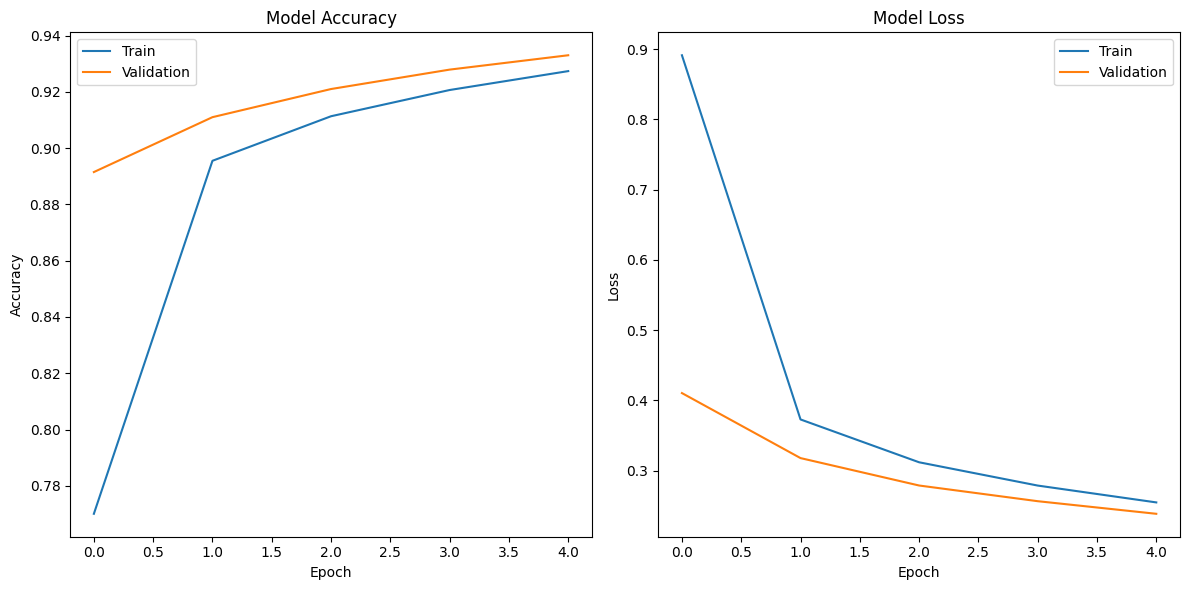

In [21]:
model_1 = create_model()
model_1.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
loss, accuracy = model_1.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')
plot_training_history(history_1)

> # **Stochastic Gradient Descent**

Epoch 1/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 172s 3ms/step - accuracy: 0.8873 - loss: 0.3595 - val_accuracy: 0.9454 - val_loss: 0.1771
Epoch 2/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 156s 3ms/step - accuracy: 0.9672 - loss: 0.1043 - val_accuracy: 0.9748 - val_loss: 0.0803
Epoch 3/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 150s 2ms/step - accuracy: 0.9747 - loss: 0.0794 - val_accuracy: 0.9694 - val_loss: 0.1053
Epoch 4/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 171s 3ms/step - accuracy: 0.9818 - loss: 0.0580 - val_accuracy: 0.9770 - val_loss: 0.0785
Epoch 5/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 165s 3ms/step - accuracy: 0.9855 - loss: 0.0445 - val_accuracy: 0.9776 - val_loss: 0.0838
Test Accuracy: 0.9776, Test Loss: 0.0838


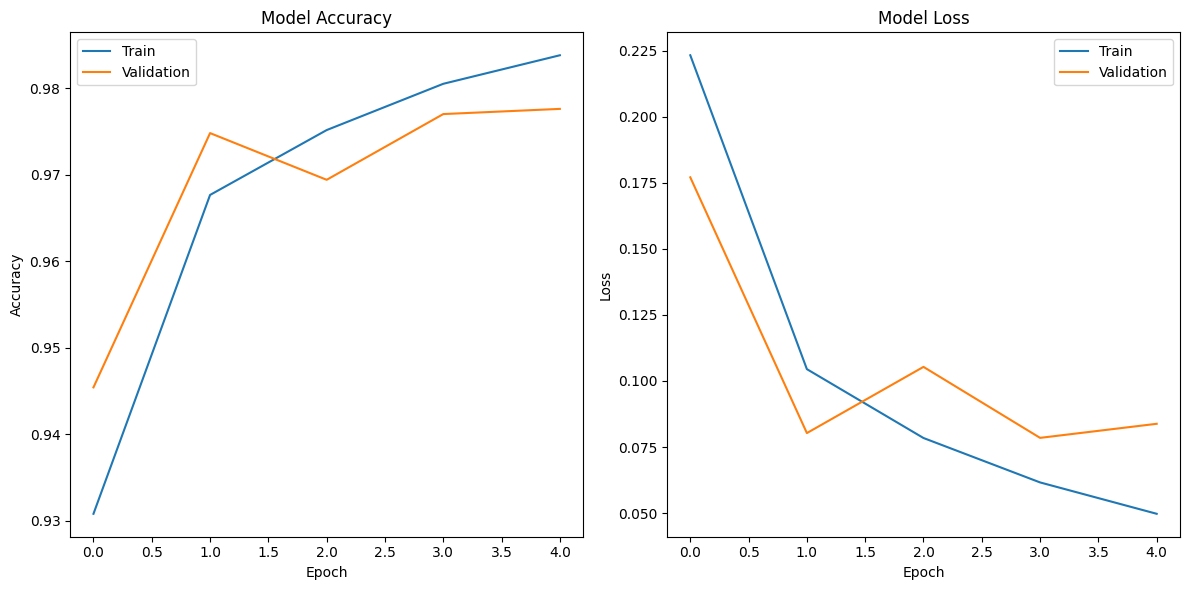

In [35]:
model_2 = create_model()
model_2.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train, epochs=5, batch_size=1, validation_data=(x_test, y_test))
loss, accuracy = model_2.evaluate(x_test, y_test, verbose=0)

print(f'Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')
plot_training_history(history_2)

> # **Stochastic Gradient Descent with Momentum**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8131 - loss: 0.6398 - val_accuracy: 0.9463 - val_loss: 0.1767
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9509 - loss: 0.1674 - val_accuracy: 0.9640 - val_loss: 0.1275
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9660 - loss: 0.1155 - val_accuracy: 0.9662 - val_loss: 0.1084
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9750 - loss: 0.0842 - val_accuracy: 0.9676 - val_loss: 0.1003
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9792 - loss: 0.0688 - val_accuracy: 0.9749 - val_loss: 0.0830
Test Accuracy: 0.9749, Test Loss: 0.0830


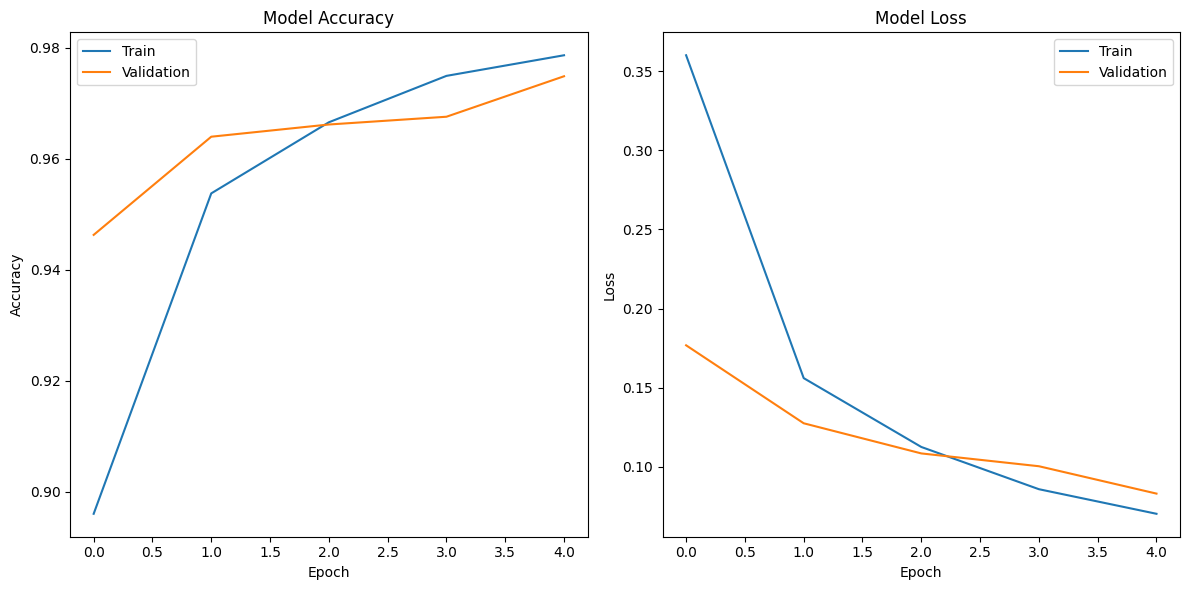

In [22]:
model_3 = create_model()
model_3.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
loss, accuracy = model_3.evaluate(x_test, y_test, verbose=0)

print(f'Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')
plot_training_history(history_3)

> # **Mini Batch Gradient Descent with Momentum**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5889 - loss: 1.4167 - val_accuracy: 0.8960 - val_loss: 0.3872
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8988 - loss: 0.3712 - val_accuracy: 0.9130 - val_loss: 0.3033
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9126 - loss: 0.3027 - val_accuracy: 0.9255 - val_loss: 0.2661
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9227 - loss: 0.2698 - val_accuracy: 0.9309 - val_loss: 0.2428
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9299 - loss: 0.2455 - val_accuracy: 0.9352 - val_loss: 0.2284
Test Accuracy: 0.9352, Test Loss: 0.2284


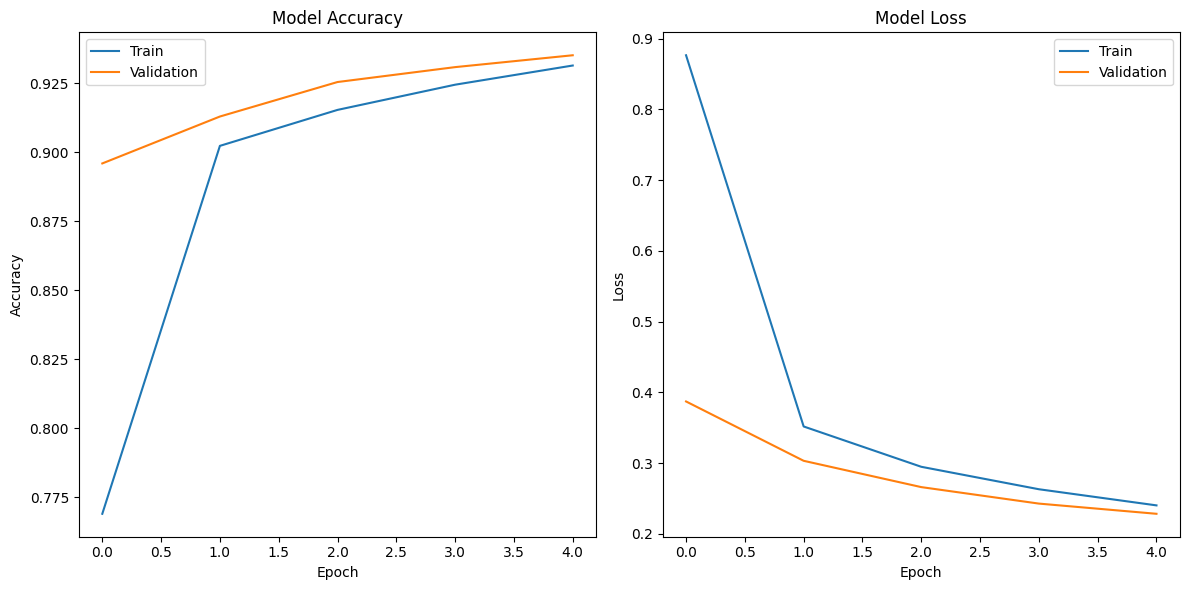

In [28]:
model_4 = create_model()
model_4.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

history_4 = model_4.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
loss, accuracy = model_4.evaluate(x_test, y_test, verbose=0)

print(f'Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')
plot_training_history(history_4)

> # **Adagrad**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4252 - loss: 1.9203 - val_accuracy: 0.7840 - val_loss: 1.0115
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7968 - loss: 0.8943 - val_accuracy: 0.8484 - val_loss: 0.6411
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8489 - loss: 0.6212 - val_accuracy: 0.8746 - val_loss: 0.5126
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8726 - loss: 0.5072 - val_accuracy: 0.8882 - val_loss: 0.4474
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8787 - loss: 0.4604 - val_accuracy: 0.8966 - val_loss: 0.4078
Test Accuracy: 0.8966, Test Loss: 0.4078


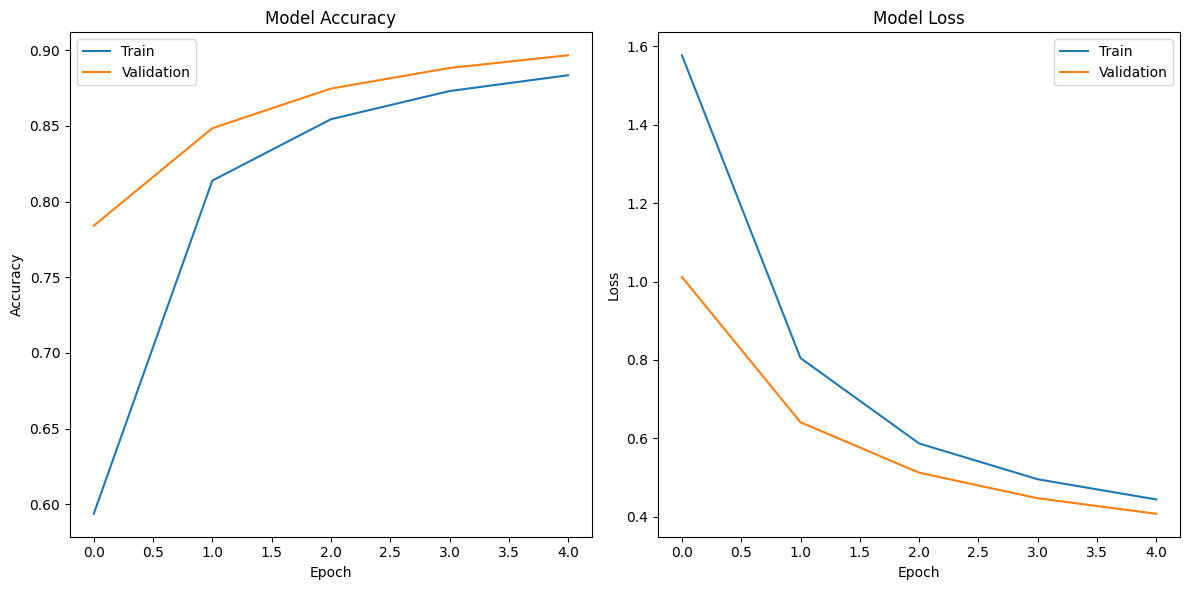

In [29]:
model_5 = create_model()
model_5.compile(optimizer=Adagrad(), loss='categorical_crossentropy', metrics=['accuracy'])

history_5 = model_5.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
loss, accuracy = model_5.evaluate(x_test, y_test, verbose=0)

print(f'Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')
plot_training_history(history_5)

> # **RMS Prop**

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8670 - loss: 0.4681 - val_accuracy: 0.9547 - val_loss: 0.1536
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9628 - loss: 0.1234 - val_accuracy: 0.9679 - val_loss: 0.1027
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9753 - loss: 0.0802 - val_accuracy: 0.9729 - val_loss: 0.0902
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9811 - loss: 0.0619 - val_accuracy: 0.9752 - val_loss: 0.0817
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9849 - loss: 0.0485 - val_accuracy: 0.9788 - val_loss: 0.0785
Test Accuracy: 0.9788, Test Loss: 0.0785


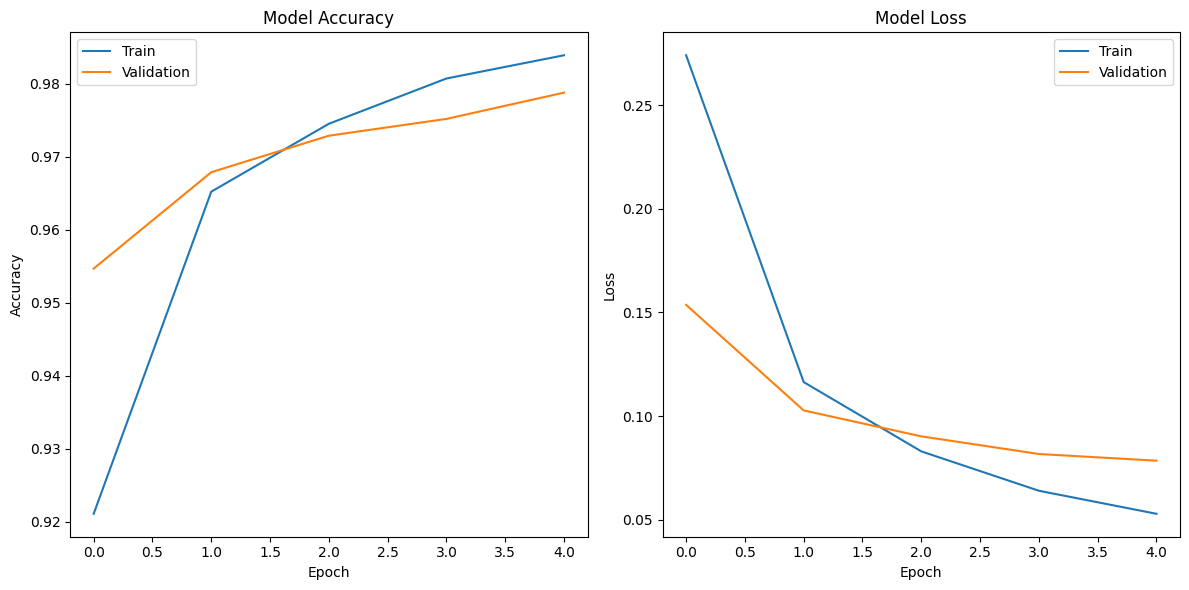

In [31]:
model_6 = create_model()
model_6.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
history_6 = model_6.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
loss, accuracy = model_6.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')
plot_training_history(history_6)

> # **Ada Delta**

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1194 - loss: 2.3385 - val_accuracy: 0.1848 - val_loss: 2.2584
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1915 - loss: 2.2433 - val_accuracy: 0.2673 - val_loss: 2.1648
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2761 - loss: 2.1514 - val_accuracy: 0.3480 - val_loss: 2.0734
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.3580 - loss: 2.0614 - val_accuracy: 0.4218 - val_loss: 1.9806
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4339 - loss: 1.9675 - val_accuracy: 0.4906 - val_loss: 1.8850
Test Accuracy: 0.4906, Test Loss: 1.8850


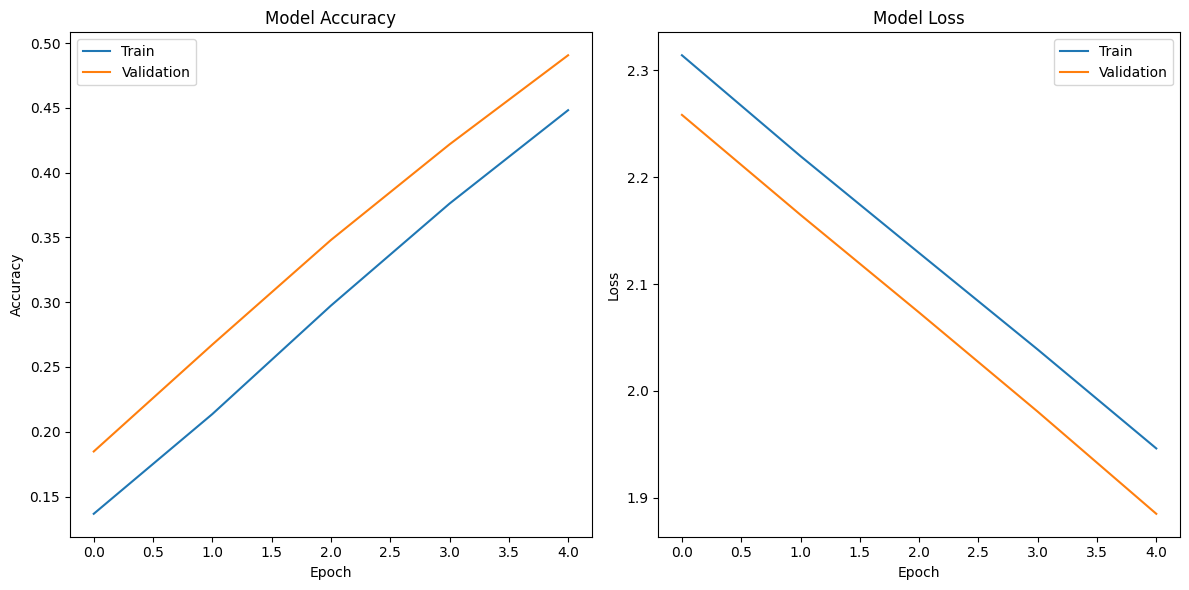

In [30]:
model_7 = create_model()
model_7.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
history_7 = model_7.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
loss, accuracy = model_7.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')
plot_training_history(history_7)

> # **Adam**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8565 - loss: 0.5039 - val_accuracy: 0.9591 - val_loss: 0.1377
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9653 - loss: 0.1199 - val_accuracy: 0.9722 - val_loss: 0.0907
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9758 - loss: 0.0773 - val_accuracy: 0.9742 - val_loss: 0.0843
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9828 - loss: 0.0576 - val_accuracy: 0.9719 - val_loss: 0.0931
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9860 - loss: 0.0459 - val_accuracy: 0.9707 - val_loss: 0.0942
Test Accuracy: 0.9707, Test Loss: 0.0942


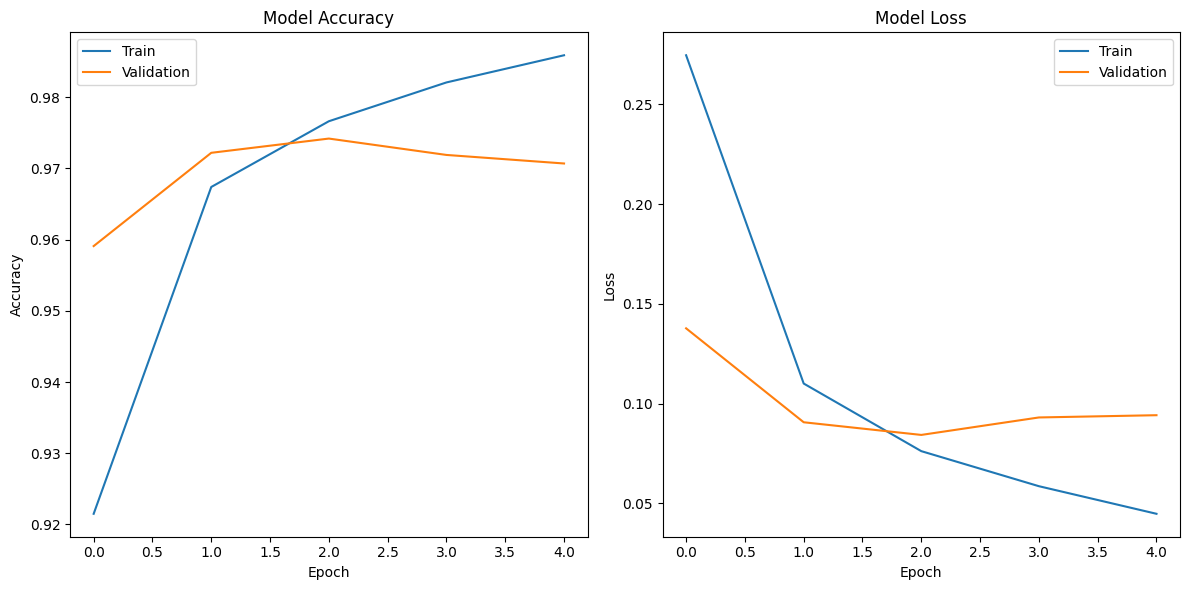

In [32]:
model_8 = create_model()
model_8.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_8 = model_8.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
loss, accuracy = model_8.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')
plot_training_history(history_8)

# **Comparing the Accuracies of the Optimzers used in the various models**

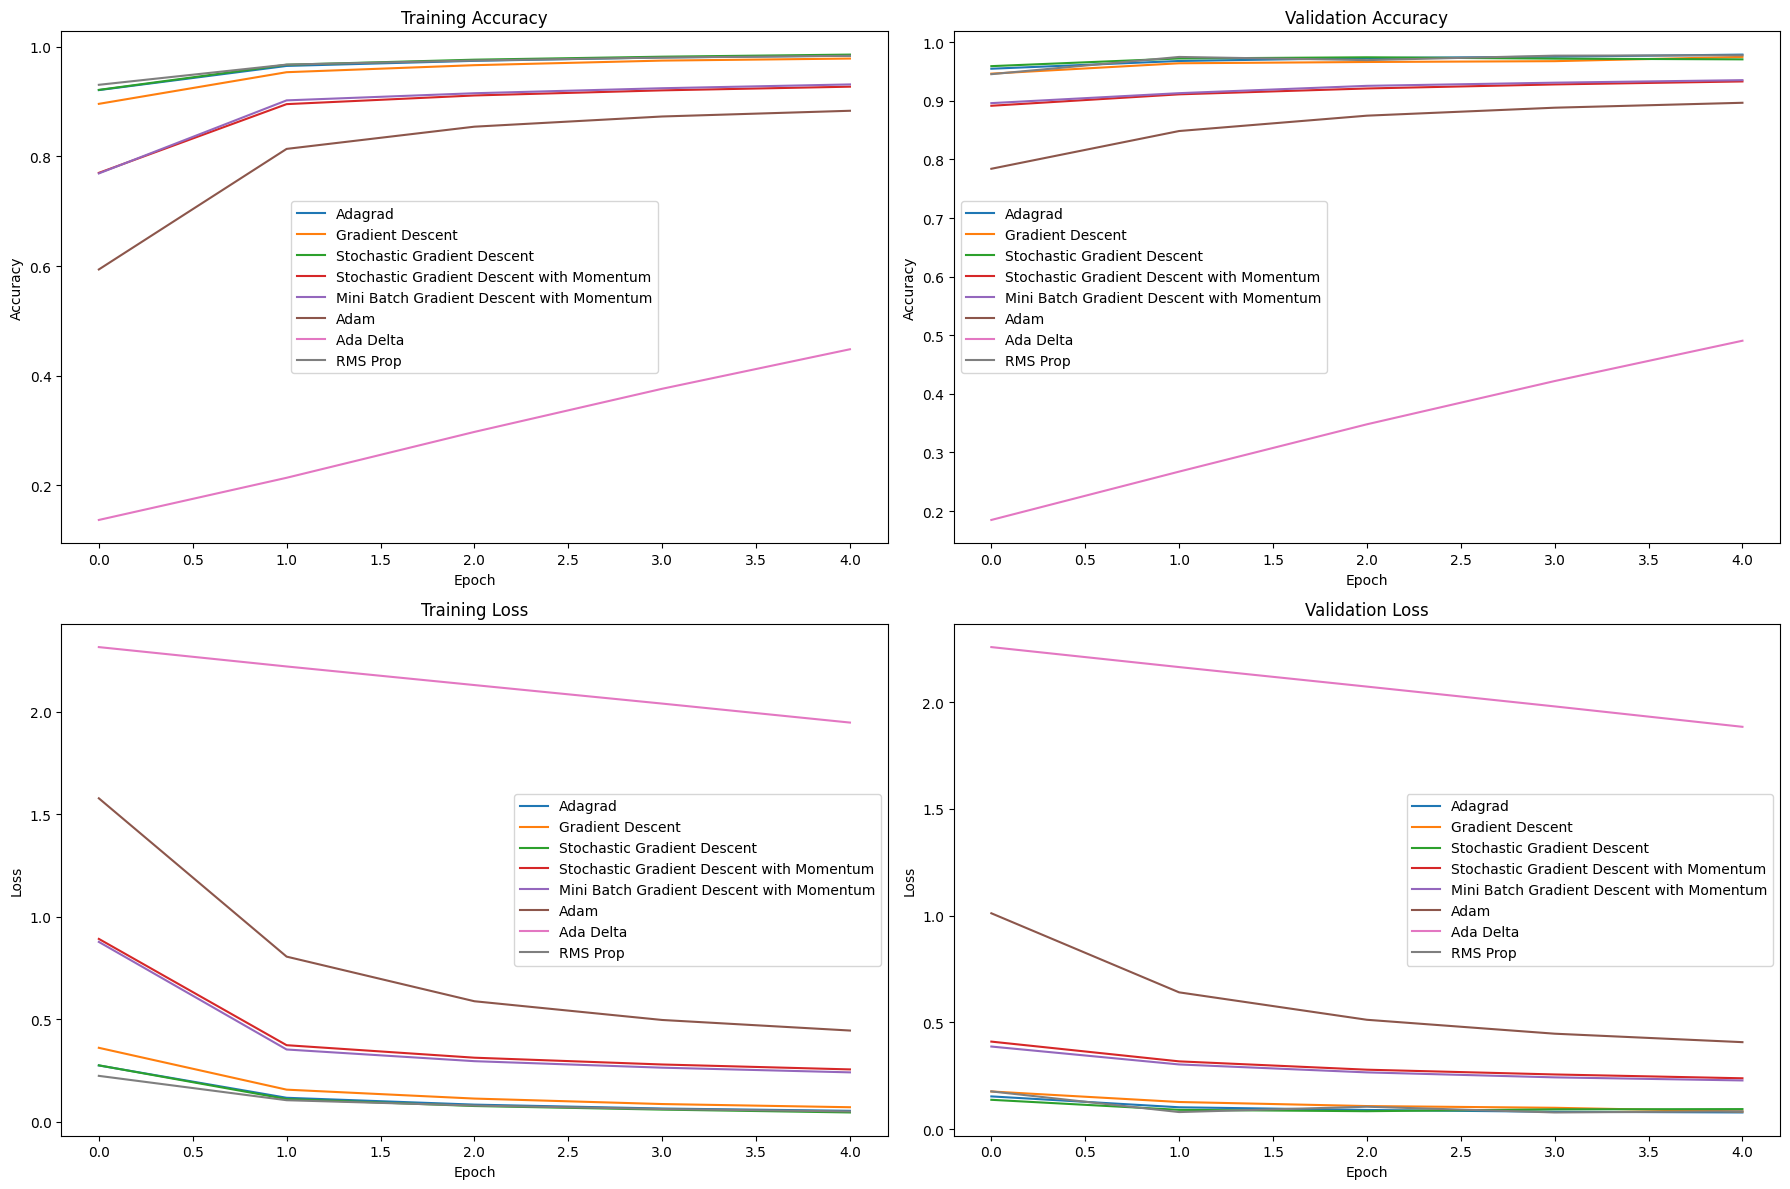

In [36]:
histories = {history_1,history_2,history_3,history_4,history_5,history_6,history_7,history_8}
models = {model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8}
optimizers = {"Gradient Descent","Stochastic Gradient Descent","Stochastic Gradient Descent with Momentum","Mini Batch Gradient Descent with Momentum","Adagrad","RMS Prop","Ada Delta","Adam"}

import matplotlib.pyplot as plt

def plot_all_metrics(histories, optimizers):
    plt.figure(figsize=(18, 12))

    # Training Accuracy
    plt.subplot(2, 2, 1)
    for history, optimizer in zip(histories, optimizers):
        plt.plot(history.history['accuracy'], label=optimizer)
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Validation Accuracy
    plt.subplot(2, 2, 2)
    for history, optimizer in zip(histories, optimizers):
        plt.plot(history.history['val_accuracy'], label=optimizer)
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training Loss
    plt.subplot(2, 2, 3)
    for history, optimizer in zip(histories, optimizers):
        plt.plot(history.history['loss'], label=optimizer)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Validation Loss
    plt.subplot(2, 2, 4)
    for history, optimizer in zip(histories, optimizers):
        plt.plot(history.history['val_loss'], label=optimizer)
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_all_metrics(histories, optimizers)


# **ADVANTAGES AND DISADVANGTES OF EACH OPTIMIZER**

1. **Gradient Descent (GD)**

> Advantages:
Simple to understand and implement.
Guarantees convergence to a local minimum for convex loss functions.

> Disadvantages:
Computationally expensive for large datasets because it uses the entire dataset to compute gradients in each iteration.
Can be slow to converge, especially for large or complex models.
May get stuck in local minima in non-convex problems.


2. **Sochastic Gradient Descent (SGD)**

>Advantages:
Faster convergence on large datasets since it updates the model parameters using only one data point at a time.
Can help escape local minima due to the noisiness in updates, which can lead to better solutions.

>Disadvantages:
High variance in updates can lead to noisy convergence, making it difficult to find the exact minimum.
Requires careful tuning of learning rate and potentially needs learning rate schedules.

3. **Stochastic Gradient Descent with Momentum**

> Advantages:
Reduces the oscillations in gradient updates, leading to smoother convergence.
Can accelerate convergence by gaining velocity in relevant directions.

> Disadvantages:
Adds an extra hyperparameter (momentum factor) that needs to be tuned.
Can still be sensitive to the learning rate and might overshoot the minimum if not tuned properly.

4. **Mini-Batch Gradient Descent with Momentum**

> Advantages:
Combines the advantages of SGD (faster convergence) and GD (stability).
Mini-batches reduce the variance of updates and help in better generalization.
Momentum helps in faster convergence and smoother updates.

> Disadvantages:
The choice of mini-batch size and momentum parameter can significantly affect performance.
Still requires careful tuning of multiple hyperparameters.

5. **Adagrad**

> Advantages:
Adapts learning rates for each parameter individually based on past gradients, which can lead to better convergence.
No need to manually adjust learning rates for each parameter.

> Disadvantages:
The learning rate can become very small over time, leading to premature convergence or slow learning.
Not suitable for problems with sparse data or features due to rapid decay of the learning rate.

6. **RMSprop**

> Advantages:
Addresses the issue of rapidly diminishing learning rates in Adagrad by using a moving average of squared gradients.
Helps in maintaining a more stable learning rate.

> Disadvantages:
Requires tuning of the decay factor (moving average parameter) and learning rate.
Can still struggle with very noisy gradients.

7. **AdaDelta**

> Advantages:
Extends RMSprop by accumulating gradients in a more effective way, avoiding the problem of diminishing learning rates.
No need to set a global learning rate.

> Disadvantages:
More complex and requires tuning of additional hyperparameters.
Still sensitive to the choice of hyperparameters, especially decay rates.

8. **Adam (Adaptive Moment Estimation)**

> Advantages:
Combines the advantages of both RMSprop and momentum by maintaining a moving average of both the gradients and their squares.
Generally performs well across a wide range of problems and requires less tuning of hyperparameters.

> Disadvantages:
Can be computationally more expensive due to additional calculations.
May not perform well for very noisy gradients or very sparse data.
Each of these optimization algorithms has its strengths and weaknesses, and the choice of which to use often depends on the specific characteristics of the problem and the dataset.